# Name: Ghufran Ahmed Barcha
# Roll-Number: C2-06    

# Section B - Practicle
# 1. Describe a scenario where you'd use Azure's Cognitive Services for languages analysis and explain your choice of service.

    I am a student working on a personal upwork project where the client asked me to do q text sentimental anaysis on customer reviews about a his food website.As the deadline was short  I  use Azure's Text Analytics service to analyze the text of the reviews and identify the positive, negative, and neutral sentiment. This information was asked by client.

    I  choose Azure's Text Analytics service because it is a pre-configured service that can be used to analyze text for a variety of purposes, including sentiment analysis. It is also a scalable service that can handle large amounts of data.

    Steps on how I complete client request:
    - I first collected the data from customer.
    - I then create a collection to store the customer reviews.
    - then use the Text Analytics API to analyze the text of the reviews.
    - The API return the sentiment of each review, as well as other information such as the key phrases and entities in the review.
    - I  used this information to analyze the customer sentiment about the food website.

    I know that Azure's Text Analytics service would be a valuable tool for this upword project. It would allow me to easily and efficiently analyze a large amount of client food website text data, and it would provide me with valuable insights into customer sentiment.

    There are also some additional benefits of using Azure's Cognitive Services for languages analysis:

    - It is a cloud-based service, so I don't need to worry about managing or maintaining the infrastructure or running any code on my laptop.
    - It is easy to use, with a simple API we can use it can complete the task.
    - It is secure services, with data encryption and access control features so i dont have to wory about client data being leaked or misused.

    Thats why i used Azure's Cognitive Services languages analysis for my upwork project.

# Twitter Text Sentimental Analysis
## I use Twitter text sentimental anylsis dataset from kaggle


In [2]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
## Dowmload necessary words data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Collection

In [4]:
## Retrive data here using pandas Dataframe
 
## As I can not share my friends data instead i am going to use a ml code on     
    
train_df = pd.read_csv("./Final Exam/twitter_training.csv" ,header = None)
test_df = pd.read_csv("./Final Exam/twitter_validation.csv" ,header = None)
train_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
## View the Train Data and test data
train_df = train_df.drop(train_df.iloc[:,0:2],axis = 1)
test_df = test_df.drop(test_df.iloc[:,0:2],axis = 1)

In [6]:
## view the data
text_df = pd.concat((train_df ,test_df) ,axis = 0)
text_df.rename(columns = {2 : "sentiment" ,3: "text"} ,inplace = True)
text_df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
text_df.shape

(75682, 2)

# Data Cleaning & Preprocessing

In [8]:
## check for nan and missing values
print(text_df.isna().sum())

# drops Nan Values from DataFrame
text_df.dropna(inplace=True)

print("\n" ,"After droped ")
print(text_df.isna().sum())

sentiment      0
text         686
dtype: int64

 After droped 
sentiment    0
text         0
dtype: int64


In [9]:
## check for duplicates
print("Duplicated Rows",text_df.duplicated().sum())


## Drop duplicates values
text_df.drop_duplicates(inplace = True)

print("Duplicated Rows after",text_df.duplicated().sum())

Duplicated Rows 4744
Duplicated Rows after 0


In [10]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def textProcessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
    text = [lemmatizer.lemmatize(token) for token in tokens]
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [11]:
text_df["text"] = text_df['text'].apply(textProcessing)

In [12]:
## Check text data
text_df['text']

0                           im getting borderland murder
1                                     coming border kill
2                             im getting borderland kill
3                            im coming borderland murder
4                         im getting borderland 2 murder
                             ...                        
988    suikoden 2 1 alex kidd miracle world persona 3...
989    thank matching fund home depot rw payment 2155...
991    late night stream boy come watch warzone run s...
995    toronto art culture capital canada wonder want...
996    actually good move tot bring viewer wa one peo...
Name: text, Length: 70252, dtype: object

In [13]:
text_df["sentiment"].value_counts()

Negative      21329
Positive      19271
Neutral       17281
Irrelevant    12371
Name: sentiment, dtype: int64

# Data Visualization 

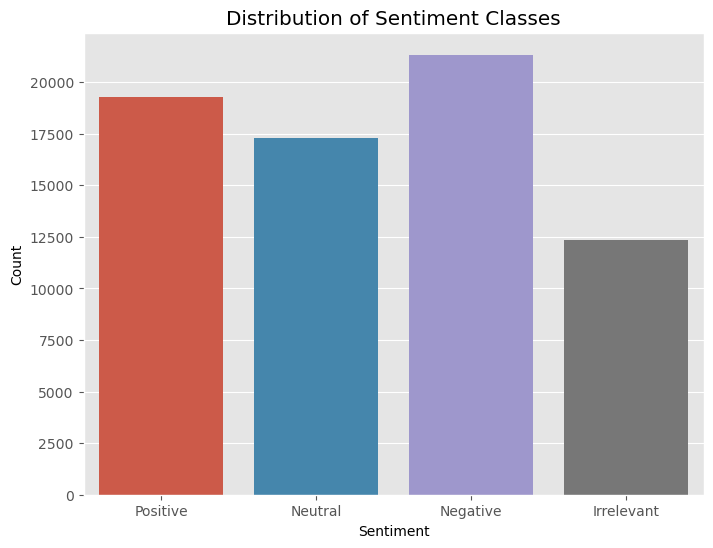

In [14]:
## Visualize the sentiment Distribution

# Visualizing the Sentiment Distribution
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
sns.countplot(data=text_df, x='sentiment')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Model selection and Training

In [23]:
## import necessary library for
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report ,accuracy_score


In [16]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
text_df['sentiment_encoded'] = label_encoder.fit_transform(text_df['sentiment'])
text_df['sentiment_encoded']

label_encoder.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

## Split the data

In [27]:
## Split the data
x = text_df["text"]
y = text_df["sentiment_encoded"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,random_state = 42 ,test_size = 0.3)


28469                                    unkplaystationcom
12381                                           game nba2k
40012    thanks fun stream weapon nice lot whose laugh ...
63977    eamaddennfl yall ever gon na fix community fil...
32006    uh peeper quest dont leagueoflegends riotsuppo...
                               ...                        
49982    idiot would walk one room another saying fifa ...
43308    guy let unfollow imrankhanpti pubg unbannedwe ...
51711    one stranger thing red dead redemption 2 offli...
65270    eamaddennfl swami _ ea equipment _ guru reduce...
34613    look toward great bash style game love new update
Name: text, Length: 21076, dtype: object

## Using TfidfVectorizer technique

In [36]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test =  vectorizer.transform(x_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest model
random_forest = RandomForestClassifier()

## fit model
random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [21]:
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))

Random Forest - Train Score: 0.9904628273954774
Random Forest - Test Score: 0.9030650977415069
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3190
           1       0.95      0.88      0.91      6864
           2       0.88      0.92      0.90      5045
           3       0.92      0.88      0.90      5977

    accuracy                           0.90     21076
   macro avg       0.89      0.91      0.90     21076
weighted avg       0.91      0.90      0.90     21076



# SVM

In [25]:
svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Training data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9401333984057264
Model Score on Training data 0.8482159802619093
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      3404
           1       0.89      0.85      0.87      6613
           2       0.83      0.85      0.84      5167
           3       0.86      0.83      0.85      5892

    accuracy                           0.85     21076
   macro avg       0.84      0.85      0.85     21076
weighted avg       0.85      0.85      0.85     21076



# Deployment code

In [41]:
text = ["congratulations on having good marks"]
x_t =  vectorizer.transform(text)

prediction = random_forest.predict(x_t)
print(label_encoder.classes_[prediction][0])

Positive
